<a href="https://colab.research.google.com/github/Lasttrader/Neural_networks_computer_vision/blob/master/nn_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)


Using TensorFlow backend.


#Загружаем картинки

In [0]:
!ls

sample_data


In [0]:
files.upload()
!ls

Saving 0001TP_006690.png to 0001TP_006690 (1).png
Saving 0001TP_006720.png to 0001TP_006720 (1).png
Saving 0001TP_006750.png to 0001TP_006750 (1).png
Saving 0001TP_006780.png to 0001TP_006780 (1).png
Saving 0001TP_006810.png to 0001TP_006810 (1).png
Saving 0001TP_006840.png to 0001TP_006840 (1).png
Saving 0001TP_006870.png to 0001TP_006870 (1).png
Saving 0001TP_006900.png to 0001TP_006900 (1).png
Saving 0001TP_006930.png to 0001TP_006930 (1).png
Saving 0001TP_006960.png to 0001TP_006960 (1).png
'0001TP_006690 (1).png'   0001TP_006780.png	  '0001TP_006900 (1).png'
 0001TP_006690.png	 '0001TP_006810 (1).png'   0001TP_006900.png
'0001TP_006720 (1).png'   0001TP_006810.png	  '0001TP_006930 (1).png'
 0001TP_006720.png	 '0001TP_006840 (1).png'   0001TP_006930.png
'0001TP_006750 (1).png'   0001TP_006840.png	  '0001TP_006960 (1).png'
 0001TP_006750.png	 '0001TP_006870 (1).png'   0001TP_006960.png
'0001TP_006780 (1).png'   0001TP_006870.png	   sample_data


In [0]:
images = []

images.append(image.load_img('0001TP_006690.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006720.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006750.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006780.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006810.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006840.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006870.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006900.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006930.png', target_size=(352, 480)))
images.append(image.load_img('0001TP_006960.png', target_size=(352, 480)))

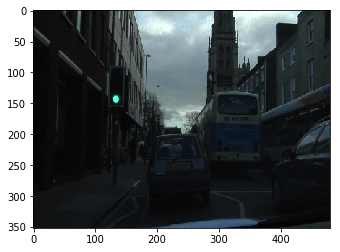

In [0]:
plt.imshow(images[0].convert('RGBA'))
plt.show()

In [0]:
segments = []

segments.append(image.load_img('0001TP_006690 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006720 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006750 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006780 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006810 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006840 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006870 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006900 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006930 (1).png', target_size=(352, 480)))
segments.append(image.load_img('0001TP_006960 (1).png', target_size=(352, 480)))

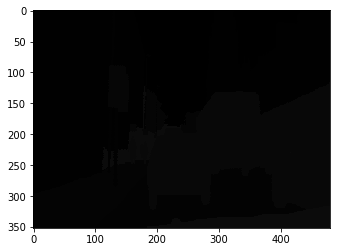

In [0]:
plt.imshow(segments[0].convert('RGBA'))
plt.show()

#Загружаем уменьшенные картинки

In [0]:
images = []

images.append(image.load_img('0001TP_006690.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006720.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006750.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006780.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006810.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006840.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006870.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006900.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006930.png', target_size=(88, 120)))
images.append(image.load_img('0001TP_006960.png', target_size=(88, 120)))

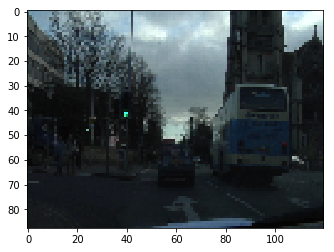

In [0]:
plt.imshow(images[9].convert('RGBA'))
plt.show()

In [0]:
segments = []

segments.append(image.load_img('0001TP_006690 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006720 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006750 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006780 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006810 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006840 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006870 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006900 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006930 (1).png', target_size=(88, 120)))
segments.append(image.load_img('0001TP_006960 (1).png', target_size=(88, 120)))

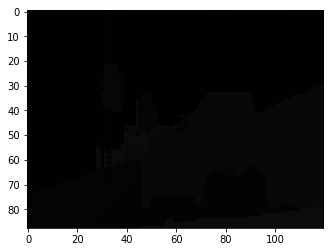

In [0]:
plt.imshow(segments[0].convert('RGBA'))
plt.show()

#Создаём обучающую выборку

In [0]:
xTrain = []

for img in images:
  x = image.img_to_array(img)
  xTrain.append(x)

xTrain = np.array(xTrain)

In [0]:
print(xTrain.shape)

(10, 88, 120, 3)


In [0]:
yTrain = []

for seg in segments:
  y = image.img_to_array(seg)
  yTrain.append(y)

yTrain = np.array(yTrain)

**Раскрашиваем сегментированную картинку**

In [0]:
def index2Color(index):
  
  color = (0,0,0)
  if (index == 0): color = (200, 0, 0)
  if (index == 1): color = (0, 200, 0)
  if (index == 2): color = (0, 0, 200)
  if (index == 3): color = (200, 200, 0)
  if (index == 4): color = (200, 0, 200)
  if (index == 5): color = (0, 200, 0)
  if (index == 6): color = (200, 200, 200)
  if (index == 7): color = (100, 0, 0)
  if (index == 8): color = (0, 100, 0)
  if (index == 9): color = (0, 0, 100)
  if (index == 10): color = (100, 100, 0)
  if (index == 11): color = (0, 100, 100)
    
  return color

In [0]:
outY = []

for pr in yTrain:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(currPr[i][j][0]))
    currMatr.append(currStr)
  outY.append(currMatr)

outY = np.array(outY)
outY = outY.astype('uint8')

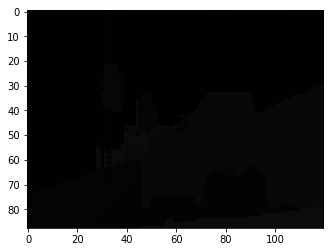

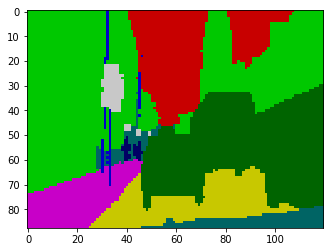

In [0]:
n = 0
plt.imshow(segments[n].convert('RGBA'))
plt.show()
img = Image.fromarray(outY[n])
plt.imshow(img.convert('RGBA'))
plt.show()

**Превращаем сегментированную картинку в 12 классов One hot encoding**

In [0]:
yTrain12 = []
for t in range(yTrain.shape[0]):
  yy = yTrain[t].copy()
  yyNew = []

  for i in range(yy.shape[0]):
    currYYstr = []
    for j in range(yy.shape[1]):
      currYYstr.append(utils.to_categorical(yy[i][j][0], 12))
    yyNew.append(currYYstr)

  yyNew = np.array(yyNew)
  yTrain12.append(yyNew)

yTrain12 = np.array(yTrain12)

In [0]:
print(xTrain.shape)
print(yTrain12.shape)

(10, 88, 120, 3)
(10, 88, 120, 12)


#Уменьшенная выборка на 3 класса

In [0]:
yTrain3 = []
for t in range(yTrain.shape[0]):
  yy = yTrain[t].copy()
  yyNew = []

  for i in range(yy.shape[0]):
    currYYstr = []
    for j in range(yy.shape[1]):
      data = min(2, yy[i][j][0])
      currYYstr.append(utils.to_categorical(data, 3))
    yyNew.append(currYYstr)

  yyNew = np.array(yyNew)
  yTrain3.append(yyNew)

yTrain3 = np.array(yTrain3)

In [0]:
print(yTrain3.shape)

(10, 88, 120, 3)


In [0]:
outY3 = []

for pr in yTrain3:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(np.argmax(currPr[i][j])))
    currMatr.append(currStr)
  outY3.append(currMatr)

outY3 = np.array(outY3)
outY3 = outY3.astype('uint8')

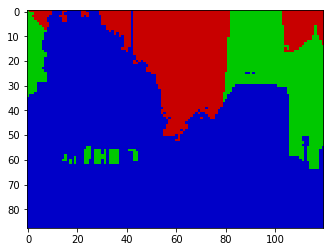

In [0]:
n = 9
img = Image.fromarray(outY3[n])
plt.imshow(img.convert('RGBA'))
plt.show()

#Линейная сегментирующая сеть

In [0]:
def linearUnet(num_classes = 6, input_shape= (352, 480, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(32, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    return model

In [0]:
modelL = linearUnet(3, (88, 120, 3))
history = modelL.fit(xTrain[:8], yTrain3[:8], epochs=30, batch_size=5, validation_data=(xTrain[8:], yTrain3[8:]))

W0720 10:10:58.200729 139699055748992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 10:10:58.250851 139699055748992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 10:10:58.261456 139699055748992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 10:10:58.338666 139699055748992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0720 10:10:58.340030 1396990557

Train on 8 samples, validate on 2 samples
Epoch 1/30
8/8 [==============================] - 1s 184ms/step - loss: 1.3251 - dice_coef: 0.3582 - val_loss: 0.9220 - val_dice_coef: 0.4501
Epoch 2/30
8/8 [==============================] - 1s 76ms/step - loss: 0.9210 - dice_coef: 0.4525 - val_loss: 0.8056 - val_dice_coef: 0.5260
Epoch 3/30
8/8 [==============================] - 1s 74ms/step - loss: 0.7464 - dice_coef: 0.5320 - val_loss: 0.8395 - val_dice_coef: 0.5358
Epoch 4/30
8/8 [==============================] - 1s 79ms/step - loss: 0.6715 - dice_coef: 0.5692 - val_loss: 0.8991 - val_dice_coef: 0.5285
Epoch 5/30
8/8 [==============================] - 1s 75ms/step - loss: 0.6284 - dice_coef: 0.5893 - val_loss: 0.9543 - val_dice_coef: 0.5164
Epoch 6/30
8/8 [==============================] - 1s 71ms/step - loss: 0.5915 - dice_coef: 0.6056 - val_loss: 0.9933 - val_dice_coef: 0.5085
Epoch 7/30
8/8 [==============================] - 1s 75ms/step - loss: 0.5634 - dice_coef: 0.6192 - val_loss: 1

#Распознаём обучающую выборку

In [0]:
predL = modelL.predict(xTrain)
print(predL.shape)

(10, 88, 120, 3)


In [0]:
outL = []

for pr in predL:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(np.argmax(currPr[i][j])))
    currMatr.append(currStr)
  outL.append(currMatr)

outL = np.array(outL)
outL = outL.astype('uint8')

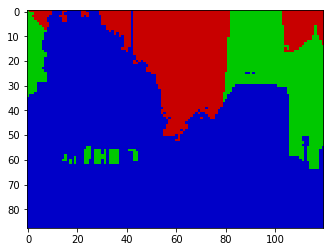

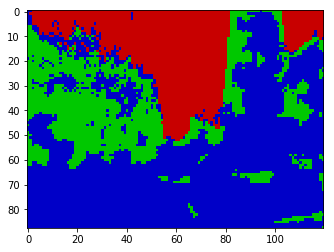

In [0]:
n = 9
img = Image.fromarray(outY3[n])
plt.imshow(img.convert('RGBA'))
plt.show()
img = Image.fromarray(outL[n])
plt.imshow(img.convert('RGBA'))
plt.show()

#Создаём и обучаем U-net

In [0]:
def unet(num_classes = 6, input_shape= (352, 480, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    #x = MaxPooling2D()(block_4_out)

    # Block 5 сжимает последний
    #x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)

    #x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)

    #x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)


    # Load pretrained weights.
    #for_pretrained_weight = MaxPooling2D()(x)
    #vgg16 = Model(img_input, for_pretrained_weight)
    #vgg16.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=True)

    # UP 1 разжимает последний
    #x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)

    #x = concatenate([x, block_4_out])
    #x = Conv2D(512, (3, 3), padding='same')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)

    #x = Conv2D(512, (3, 3), padding='same')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)

    # UP 2  - разжимает
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3 разжимает
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4 разжимает
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    #model.summary()
    return model

In [0]:
model = unet(3, (88, 120, 3))
history = model.fit(xTrain, yTrain3, epochs=30, batch_size=5)

W0720 10:36:59.009560 139699055748992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Epoch 1/30
10/10 [==============================] - 16s 2s/step - loss: 1.1823 - dice_coef: 0.4008
Epoch 2/30
10/10 [==============================] - 11s 1s/step - loss: 0.6075 - dice_coef: 0.6179
Epoch 3/30
10/10 [==============================] - 11s 1s/step - loss: 0.3800 - dice_coef: 0.7338
Epoch 4/30
10/10 [==============================] - 11s 1s/step - loss: 0.2934 - dice_coef: 0.8236
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 0.2666 - dice_coef: 0.8547
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 0.2544 - dice_coef: 0.8478
Epoch 7/30
10/10 [==============================] - 11s 1s/step - loss: 0.1967 - dice_coef: 0.8701
Epoch 8/30
10/10 [==============================] - 11s 1s/step - loss: 0.1843 - dice_coef: 0.8890
Epoch 9/30
10/10 [==============================] - 11s 1s/step - loss: 0.1656 - dice_coef: 0.9011
Epoch 10/30
10/10 [==============================] - 11s 1s/step - loss: 0.1437 - dice_coef: 0.9103
Epoch 11/

#Распознаём обучающую выборку

In [0]:
pred = model.predict(xTrain)
print(pred.shape)

(10, 88, 120, 3)


In [0]:
out = []

for pr in pred:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(np.argmax(currPr[i][j])))
    currMatr.append(currStr)
  out.append(currMatr)

out = np.array(out)
out = out.astype('uint8')

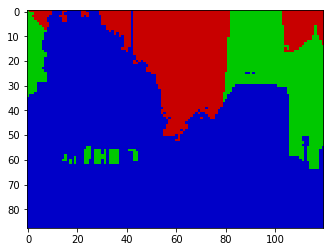

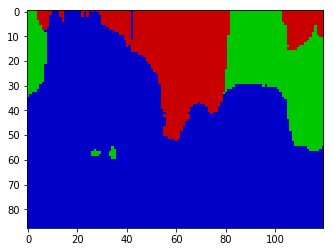

In [0]:
n = 9
img = Image.fromarray(outY3[n])
plt.imshow(img.convert('RGBA'))
plt.show()
img = Image.fromarray(out[n])
plt.imshow(img.convert('RGBA'))
plt.show()

#Упрощённая U-net

In [0]:
def simpleUnet(num_classes = 6, input_shape= (352, 480, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(32, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(64, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    
    # UP 1
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    #model.summary()
    return model

In [0]:
modelS = simpleUnet(3, (88, 120, 3))
history = modelS.fit(xTrain, yTrain3, epochs=30, batch_size=5)

Epoch 1/30
10/10 [==============================] - 6s 563ms/step - loss: 1.2231 - dice_coef: 0.3403
Epoch 2/30
10/10 [==============================] - 2s 222ms/step - loss: 0.8852 - dice_coef: 0.4563
Epoch 3/30
10/10 [==============================] - 2s 221ms/step - loss: 0.7084 - dice_coef: 0.5437
Epoch 4/30
10/10 [==============================] - 2s 225ms/step - loss: 0.6310 - dice_coef: 0.5870
Epoch 5/30
10/10 [==============================] - 2s 222ms/step - loss: 0.5539 - dice_coef: 0.6242
Epoch 6/30
10/10 [==============================] - 2s 220ms/step - loss: 0.4857 - dice_coef: 0.6617
Epoch 7/30
10/10 [==============================] - 2s 220ms/step - loss: 0.4371 - dice_coef: 0.6946
Epoch 8/30
10/10 [==============================] - 2s 221ms/step - loss: 0.3986 - dice_coef: 0.7231
Epoch 9/30
10/10 [==============================] - 2s 223ms/step - loss: 0.3422 - dice_coef: 0.7675
Epoch 10/30
10/10 [==============================] - 2s 221ms/step - loss: 0.3401 - dice_co

In [0]:
predS = modelS.predict(xTrain)
print(predS.shape)

(10, 88, 120, 3)


In [0]:
outS = []

for pr in predS:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(np.argmax(currPr[i][j])))
    currMatr.append(currStr)
  outS.append(currMatr)

outS = np.array(outS)
outS = outS.astype('uint8')

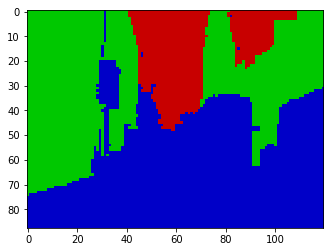

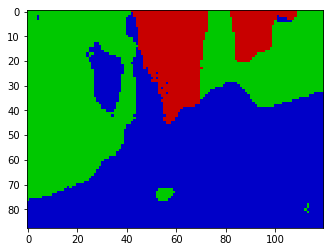

In [0]:
n = 1
img = Image.fromarray(outY3[n])
plt.imshow(img.convert('RGBA'))
plt.show()
img = Image.fromarray(outS[n])
plt.imshow(img.convert('RGBA'))
plt.show()

#Расширенная U-net

In [0]:
def unetWithMask(num_classes = 6, input_shape= (352, 480, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)
    
    block_1_out_mask = Conv2D(64, (1, 1), padding='same')(block_1_out)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    block_2_out_mask = Conv2D(128, (1, 1), padding='same')(block_2_out)
    
    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    block_3_out_mask = Conv2D(256, (1, 1), padding='same')(block_3_out)
    
    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    block_4_out_mask = Conv2D(512, (1, 1), padding='same')(block_4_out)
    
    x = MaxPooling2D()(block_4_out)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # Load pretrained weights.
    for_pretrained_weight = MaxPooling2D()(x)
    vgg16 = Model(img_input, for_pretrained_weight)
    vgg16.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=True)

    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_4_out, block_4_out_mask])
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out, block_3_out_mask])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out, block_2_out_mask])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out, block_1_out_mask])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    #model.summary()
    return model

In [0]:
modelM3 = unetWithMask(3, (352, 480, 3))
history = modelM3.fit(xTrain, yTrain3, epochs=30, batch_size=5)

W0704 13:08:22.254425 140614224541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 13:08:22.276322 140614224541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 13:08:22.281036 140614224541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 13:08:22.315128 140614224541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0704 13:08:22.316439 1406142245

Epoch 1/30
10/10 [==============================] - 246s 25s/step - loss: 1.1188 - dice_coef: 0.4034
Epoch 2/30
10/10 [==============================] - 235s 23s/step - loss: 0.5563 - dice_coef: 0.6484
Epoch 3/30
10/10 [==============================] - 235s 23s/step - loss: 0.4181 - dice_coef: 0.7639
Epoch 4/30
10/10 [==============================] - 235s 24s/step - loss: 0.2847 - dice_coef: 0.8270
Epoch 5/30
10/10 [==============================] - 236s 24s/step - loss: 0.2396 - dice_coef: 0.8653
Epoch 6/30
10/10 [==============================] - 237s 24s/step - loss: 0.2471 - dice_coef: 0.8630
Epoch 7/30
10/10 [==============================] - 236s 24s/step - loss: 0.2202 - dice_coef: 0.8656
Epoch 8/30
10/10 [==============================] - 235s 23s/step - loss: 0.1897 - dice_coef: 0.8737
Epoch 9/30
10/10 [==============================] - 234s 23s/step - loss: 0.1623 - dice_coef: 0.8929
Epoch 10/30
10/10 [==============================] - 234s 23s/step - loss: 0.1459 - dice_co

In [0]:
predM3 = modelM3.predict(xTrain)
print(predM3.shape)

(10, 352, 480, 3)


In [0]:
outM3 = []

for pr in predM3:
  currPr = pr.copy()
  currMatr = []
  for i in range(currPr.shape[0]):
    currStr = []
    for j in range(currPr.shape[1]):
      currStr.append(index2Color(np.argmax(currPr[i][j])))
    currMatr.append(currStr)
  outM3.append(currMatr)
  
outM3 = np.array(outM3)
outM3 = outM3.astype('uint8')

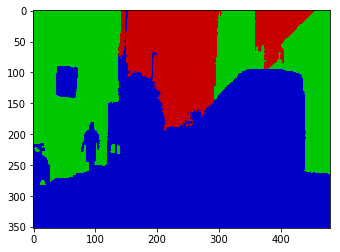

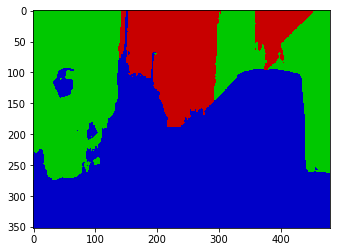

In [0]:
n = 5
img = Image.fromarray(outY3[n])
plt.imshow(img.convert('RGBA'))
plt.show()
img = Image.fromarray(outM3[n])
plt.imshow(img.convert('RGBA'))
plt.show()